## MADE, Advanced Machine Learning course
## home work #1
## group: DS_22
## student: Oleg Shchegolev

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Part 1

## Problem 1

Если предположить что подсудимый невиновен (то есть он случайный человек из города), то шанс обнаружить у него такую группу крови - 1%. Однако из этого не следует, что он виновен с вероятностью 99%. 

Обозначим: V - событие, что подсудимый виновен; G - событие иметь такую группу крови 

По теореме Байеса вероятность того что он невиновен при условии, что у него такая группа крови:

$$
p(\overline{V}\,|\,G) = \frac{p(G\,|\,\overline{V})\, *\, p(\overline{V})}{p(G)}
$$

В этой формуле p(G) - вероятность иметь такую группу крови:

$$
p(G) = p(G\,|\,V)\, *\, p(V)\, + \, p(G\,|\,\overline{V})\,*\,p(\overline{V})
$$

В этих формулах известны: $P(G\,|\,\overline{V})$ = 0.01 (то что указал прокурор), $P(G\,|\,V)$ = 1, (нам дано, что у преступника такая группа крови), $p(\overline{V}) = 1 - p(V)$ (противоположные события)

При этом для того чтобы оценить вероятность виновности/невиновности подсудимого, нужно знать $p(\overline{V})$ - априорную гипотезу, которая, вероятно, должна зависеть от того с какой вероятностью обвиняемый мог оказаться на скамье подсудимых будучи невиновным/виновным. 

Очевидно, что обнаружение редкой группы крови, идентичной группе крови преступника, у подсудимого повышает шансы на его виновность. К примеру, если взять априорную гипотезу 50/50, вероятность быть невиновным будет равна:

$$
p(\overline{V}\,|\,G) = \frac{0.01 * 0.5}{(1 * 0.5 + 0.01 * 0.5)} = 0.091 = 9.1\%
$$

Иными словами прокурору следовало бы оценить $p(\overline{V})$, исходя из остальных обстоятельств дела.

## Problem 2

Адвокат так же как и прокурор лукавит. Он указал вероятность того, что виновным будет случайно взятый с улицы человек с такой группой крови.

Если в выражение выше подставить априорную гипотезу о том, что подсудимый просто случайный человек с улицы (1 из миллиона) => p(V) = $10^{-6}$:

$$
p(\overline{V}\,|\,G) = \frac{0.01 * 0.999999}{(1 * 0.000001 + 0.01 * 0.999999)} = 0.99990001 = 99.99\%
$$

что логичным образом практически совпадает с оценкой адвоката.

Следовательно адвокату так же следовало бы предварительно произвести и обосновать свою оценку априорной гипотезы о виновности/невиновности обвиняемого на основании других материалов дела

## Problem 3

"+" - положительный тест, "-" - отрицательный, I - болезнь
$$
p(I\,|\,+) = \frac{p(+\,|\,I)\,*\,p(I)}{p(+\,|\,I)\,*\,p(I) + p(+\,|\,\overline{I})\,*\,p(\overline{I})}
$$

$$
p(I\,|\,-) = \frac{p(-\,|\,I)\,*\,p(I)}{p(-\,|\,I)\,*\,p(I) + p(-\,|\,\overline{I})\,*\,p(\overline{I})}
$$

Обозначим за $x_1$ - false negative, $x_2$ - false positive:

$$
p(I\,|\,+) = \frac{(1 - x_1)\,*\,p(I)}{(1 - x_1)\,*\,p(I) + x_2\,*\,p(\overline{I})}
$$

$$
p(I\,|\,-) = \frac{x_1\,*\,p(I)}{x_1\,*\,p(I) + (1 - x_2)\,*\,p(\overline{I})}
$$

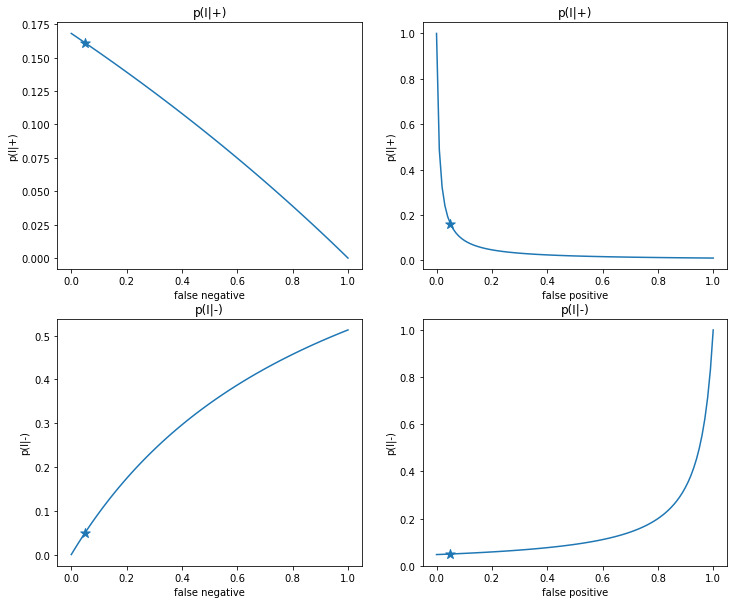

In [12]:
X = np.linspace(0, 1, 100)
    
p_I = 0.01
    
def p_I_plus(x1=0.05, x2=0.05):
    return (1 - x1) * p_I / ((1 - x1) * p_I + x2 * (1 - p_I))

def p_I_minus(x1=0.05, x2=0.05):
    return x1 * p_I / (x1 * p_I + (1 - x2) * p_I)

def plot_f(ax, y, name, xlabel, point):
    ax.plot(X, y)
    ax.scatter(0.05, point, marker='*', s=100)
    ax.set_title(name)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(name)

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()
plot_f(ax[0], p_I_plus(x1=X), 'p(I|+)', 'false negative', p_I_plus())
plot_f(ax[1], p_I_plus(x2=X), 'p(I|+)', 'false positive', p_I_plus())
plot_f(ax[2], p_I_minus(x1=X), 'p(I|-)', 'false negative', p_I_minus())
plot_f(ax[3], p_I_minus(x2=X), 'p(I|-)', 'false positive', p_I_minus())

Исходя из графиков выше, я рекомендовал бы врачам уменьшать false positive, потому, что при уменьшении этой ошибки тест p(I|+) улучшается очень существенно (его качество круто растёт), тогда как улучшение false negative не скажется кардинально ни на p(I|+), ни на p(I|-)

# Part 2

## Reading dataset for Russia

In [2]:
df = pd.read_csv('owid-covid-data.csv')
russia = 'Russia'
days_for_train = 50
df_ru = df.query('location == @russia')
df_ru = df_ru[df_ru['date'] > '2020-02-29']
df_ru['new_cases'] = df_ru['new_cases'].apply(lambda x: 1 if x == 0 else x)
df_ru.index -= df_ru.index[0]
train_data = df_ru[df_ru.index < days_for_train][['total_cases', 'new_cases']]
test_data = df_ru[df_ru.index >= days_for_train][['total_cases', 'new_cases']]
x_train, y_train = np.array(train_data.index), np.log(train_data['total_cases'].values)
y2_train = train_data['new_cases']
x_test, y_test = np.array(test_data.index), np.log(test_data['total_cases'].values)
x_full, y_full = np.append(x_train, x_test), np.append(y_train, y_test)

## Plotting target values

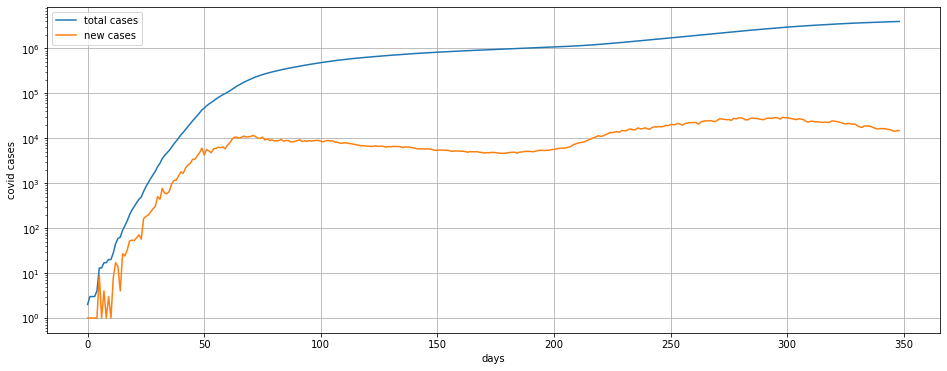

In [3]:
def make_plot(index, y1, y2, pred=False):
    plt.figure(figsize=(16,6))
    if pred:
        plt.plot(index, y1, label='predicted total cases')
        plt.plot(index, y2, label='true total cases')
    else:
        plt.plot(index, y1, label='total cases')
        plt.plot(index, y2, label='new cases')
    plt.legend()
    plt.semilogy()
    plt.xlabel('days')
    plt.ylabel('covid cases')
    plt.grid();

    
make_plot(df_ru.index, df_ru['total_cases'], df_ru['new_cases'])

## Exponential model

Target value is expected to grow exponentially with x:
$$
y - total \,cases
$$
$$
y = Ae^{bt}
$$
$$
ln(y) = a + b * t
$$

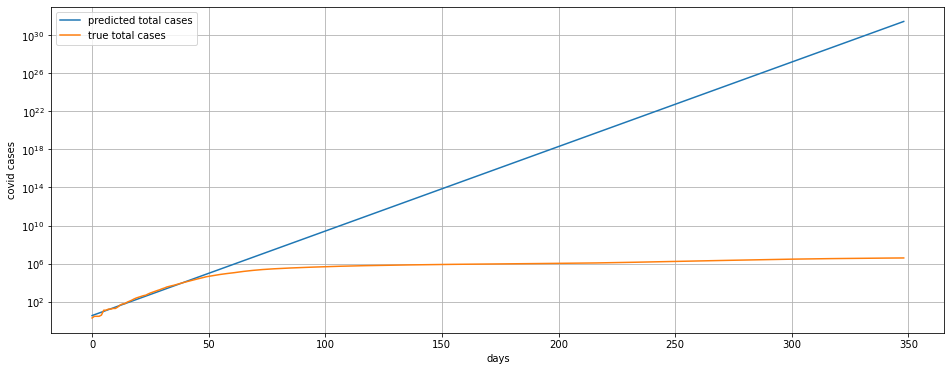

In [4]:
model = Ridge(alpha=0.1)
model.fit(x_train.reshape(-1, 1), y_train)
y_pred = model.predict(x_full.reshape(-1, 1))
make_plot(
    x_full,
    np.exp(y_pred),
    np.exp(y_full),
    pred=True
)

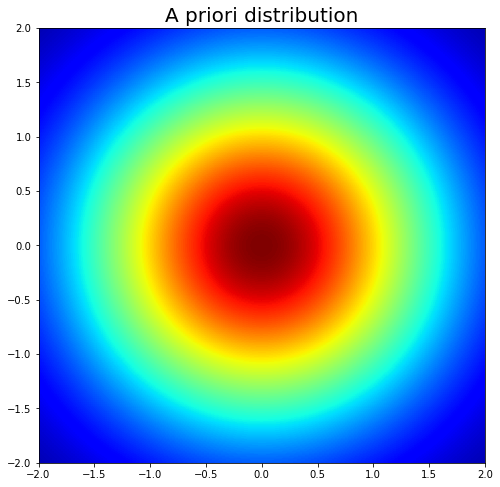

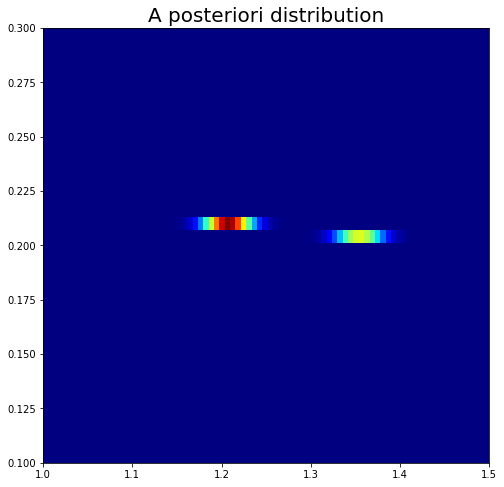

In [5]:
D = np.std((y_pred[:50] - y_full[:50])**2)**2
lamb = 0.01
alpha = D / lamb

N = 1000
xs = np.linspace(0, 50, N)
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def myplot_heatmap(Z):
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    
cur_mu, cur_sigma = np.array([0, 0]), np.array([[np.sqrt(alpha), 0], [0, np.sqrt(alpha)]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))
myplot_heatmap(Z)
plt.title("A priori distribution", fontsize=20)

def bayesian_update(mu, sigma, x, y, sigma_noise=np.sqrt(D)):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

N = 50
for px, py in zip(x_train[:N], y_train[:N]):
#     print(px, py, cur_mu, cur_sigma)
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_heatmap(Z)
ax.set_xlim((1, 1.5))
ax.set_ylim((0.1, 0.3))
plt.title("A posteriori distribution", fontsize=20);

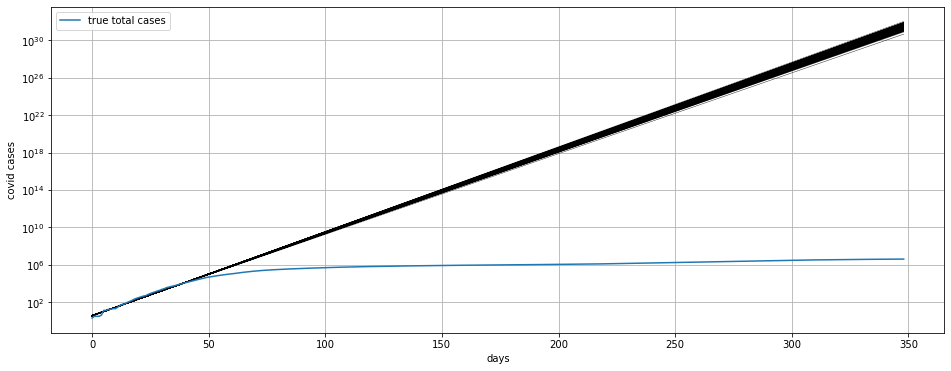

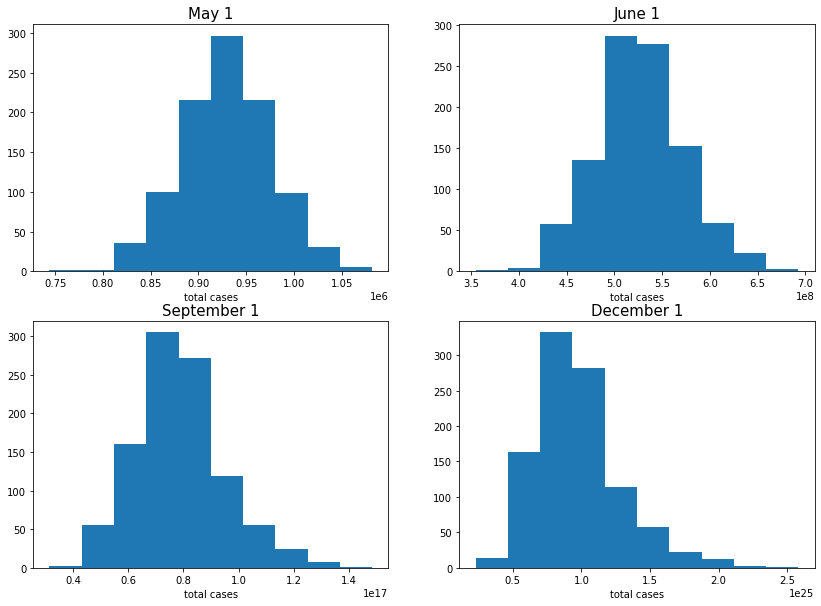

In [20]:
dates = [61, 92, 184, 275]
cases = [[], [], [], []]
names = ['May 1', 'June 1', 'September 1', 'December 1']

def myplot_sample_lines(mu, sigma, n=1000):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    plt.figure(figsize=(16,6))
    x = x_full
    for w in my_w:
        cur_cases = np.exp(w[0] + w[1]*x)
        plt.plot(x, cur_cases, 'k-', lw=.4)
        for i in range(len(dates)):
            cases[i].append(cur_cases[dates[i]])
    plt.plot(x, np.exp(y_full), label='true total cases')
    plt.legend()
    plt.semilogy()
    plt.xlabel('days')
    plt.ylabel('covid cases')
    plt.grid();
    
myplot_sample_lines(cur_mu, cur_sigma)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.ravel()
cases = np.array(cases)
for i in range(len(dates)):
    ax[i].hist(cases[i])
    ax[i].set_title(names[i], fontsize=15)
    ax[i].set_xlabel('total cases', fontsize=10)

## Sigmoidal model

target variable is expected to grow as a sigmoid (scaled cdf of the normal distribution):
$$
\Phi = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^x e^{-t^2/2} dt
$$
$$
y - total \, cases, \, \frac{dy}{dt} - new \, cases
$$
$$
y = A\int_0^t e^{ax^2 + bx + c} dx
$$
so I suggest to:
$$
\frac{dy}{dt} = Ae^{at^2 + bt + c}
$$
I'm going to learn LR on features ($t^2$, t) with target (ln(new cases)):
$$
ln(\frac{dy}{dt}) = at^2 + bt + C
$$
then:
$$
y = \Sigma_0^{days}e^{ln(\frac{dy}{dt})}
$$

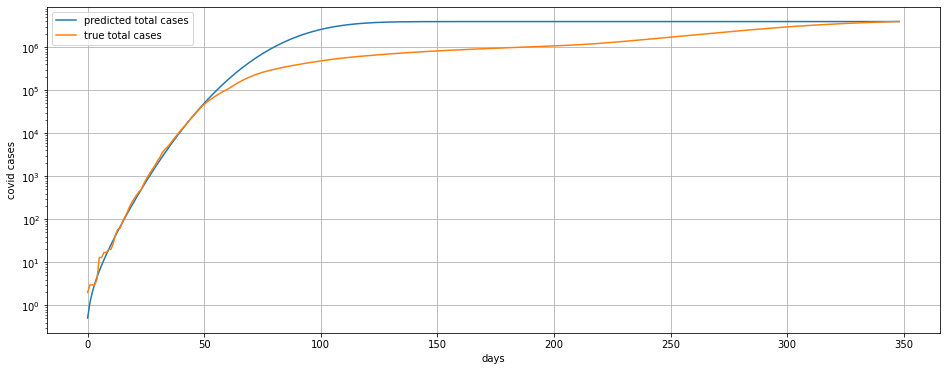

In [17]:
def change_zero_to_one(y):
    return np.vectorize(lambda x: 1 if x <= 0 else x)(y)


def make_square_features(x):
    return np.append([x*x], [x], axis=0).T


def get_y_from_diff(y):
    return np.cumsum(np.exp(y))
    
new_y_train = np.log(change_zero_to_one(y2_train))
new_x_train = make_square_features(x_train)
new_x_full = make_square_features(x_full)

model = Ridge(alpha=0.01)
model.fit(new_x_train, new_y_train)
dy_pred = model.predict(new_x_full)
new_y_pred = get_y_from_diff(dy_pred)
make_plot(
    x_full,
    new_y_pred,
    np.exp(y_full),
    pred=True
)

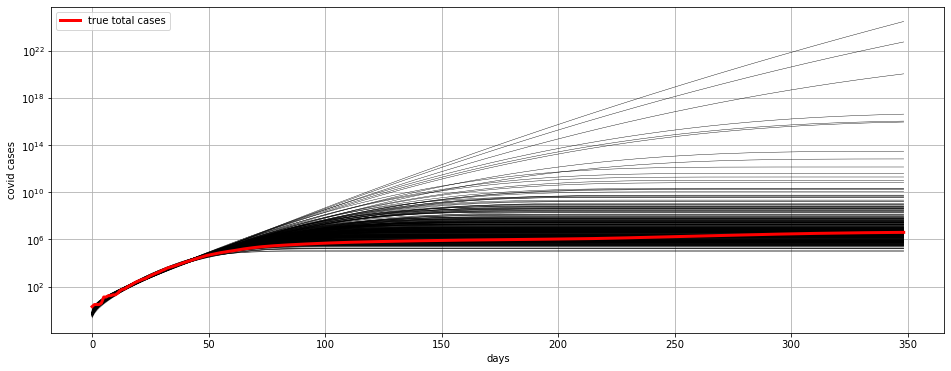

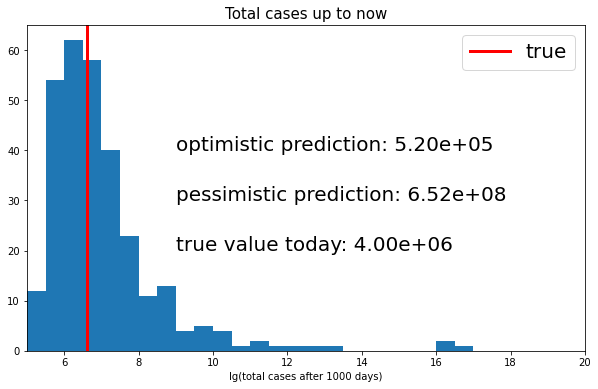

In [61]:
D = np.std((dy_pred[:50] - new_y_train[:50])**2)**2
lamb = 0.01
alpha = D / lamb

def myplot_heatmap(Z):
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    
cur_mu, cur_sigma = np.array([0, 0, 0]), np.array([[np.sqrt(alpha), 0, 0], [0, np.sqrt(alpha), 0], [0, 0, np.sqrt(alpha)]])

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

N = 50
for px, py in zip(new_x_train[:N], new_y_train[:N]):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py)

Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)

dates = [999]
cases = [[]]
names = ['Total cases up to now']

def myplot_sample_lines(mu, sigma, n=300):
    my_w = np.random.multivariate_normal(mu, sigma, n)
    plt.figure(figsize=(16,6))
    x = np.linspace(0, 1000, 1000)
    for w in my_w:
        cur_cases = get_y_from_diff(w[0] + w[1] * x**2 + w[2] * x)
        plt.plot(x[:349], cur_cases[:349], 'k-', lw=.4)
        for i in range(len(dates)):
            cases[i].append(cur_cases[dates[i]])
    plt.plot(x[:349], np.exp(y_full), label='true total cases', c='r', lw=3)
    plt.legend()
    plt.semilogy()
    plt.xlabel('days')
    plt.ylabel('covid cases')
    plt.grid();
    
myplot_sample_lines(cur_mu, cur_sigma)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = [ax]
cases = np.array(cases)
for i in range(len(dates)):
    ax[i].hist(np.log10(cases[i]), range=(5, 20), bins=30)
    ax[i].set_title(names[i], fontsize=15)
    ax[i].set_xlabel('lg(total cases after 1000 days)', fontsize=10)
    ax[i].axvline(np.log10(np.exp(y_full[-1])), c='r', lw=3, label='true')
    ax[i].legend(fontsize=20)
    ax[i].set_xlim(5, 20)
    ax[i].text(9, 40, f'optimistic prediction: {np.quantile(cases[i], q=0.1):.2e}', fontsize=20)
    ax[i].text(9, 30, f'pessimistic prediction: {np.quantile(cases[i], q=0.9):.2e}', fontsize=20)
    ax[i].text(9, 20, f'true value today: {np.exp(y_full[-1]):.2e}', fontsize=20)

## Conclusions

Из сравнения предсказания сигмоидальной гипотезы с реальными данными я бы заключил, что введение карантинных мер весной 2020 снизило число заболевших ~ в 3-4 раза, однако последующее снятие этих мер и "вторая волна" осенью всё равно вернули число на заболевших к наиболее вероятному исходу согласно гипотезе (этот вывод я сделал из-за формы кривой total_cases).Таким образом, с точки зрения эпидемиологической ситуации карантин стоило бы продолжать не снимая (скажем до массовой вакцинации) и это могло бы снизить число заболевших.
